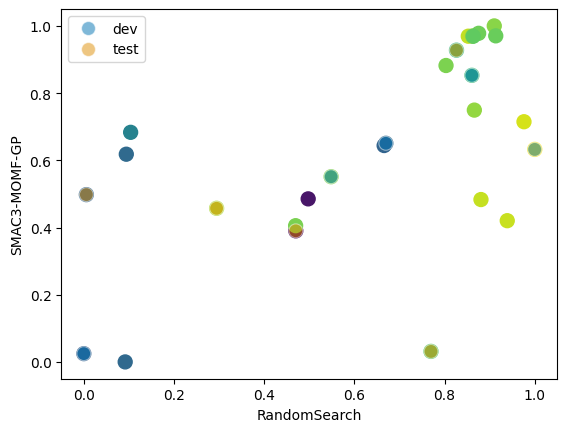

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import seaborn as sns
import datetime
import shutil
import os
from pathlib import Path
from subselect import subselect

df_crit_file = "/home/numina/Documents/repos/CARP-S-Experiments/lib/CARP-S/subselection/data_subselection/MOMF/lognorm/df_crit.csv"




ks = [5, 6, 7, 8, 9, 10, 11, 12, 13]
pointfile ="pointfile.txt"
seed = 345765
n_reps = 5000
n_points = 10
executable = "./a.out"




color_palette = sns.color_palette("colorblind", len(ks))
rng = np.random.default_rng(seed)
points = rng.uniform(0, 1, (n_points, 3))
points_df = pd.DataFrame(points, columns=["x", "y", "z"])
points_df.to_csv(pointfile, sep=" ", index=False, header=False)
points_df = pd.read_csv(df_crit_file, sep=",", index_col=0)
points = points_df.to_numpy()
points_df.to_csv(pointfile, sep=" ", index=False, header=False)
n_points, dimension = points_df.to_numpy().shape

plt.scatter(points[:, 0], points[:, 1], c=points[:, 2], s=100, cmap="viridis")
for i, k in enumerate(ks):
    subset_df, metadata = select_sets_split(points_df=points_df, k=k, n_reps=n_reps, executable=executable)

    sns.scatterplot(
        data=subset_df,
        x=subset_df.columns[0],
        y=subset_df.columns[1],
        hue="subset_id",
        palette="colorblind",
        s=100,
        alpha=0.5,
    )
    break
plt.legend()

In [10]:
subset_df

,RandomSearch,SMAC3-MOMF-GP,Nevergrad-DE,subset_id
problem_id,,,,
yahpo/MOMF/trainsize/iaml_xgboost/1489/trainsize,0.469715,0.405464,0.800177,dev
yahpo/MOMF/trainsize/iaml_ranger/1067/trainsize,0.939049,0.420321,0.917011,dev
yahpo/MOMF/epoch/lcbench/189873/epoch,0.860630,0.852904,0.677232,dev
yahpo/MOMF/trainsize/rbv2_xgboost/182/trainsize,0.091743,0.000000,0.339360,dev
yahpo/MOMF/epoch/lcbench/167185/epoch,0.666015,0.644023,0.319401,dev
yahpo/MOMF/trainsize/rbv2_ranger/6/trainsize,0.769941,0.031272,0.739225,test
yahpo/MOMF/trainsize/iaml_glmnet/1067/trainsize,0.470081,0.390136,0.000000,test
yahpo/MOMF/repl/rbv2_xgboost/12/repl,0.103834,0.683318,0.444112,test
yahpo/MOMF/trainsize/rbv2_xgboost/12/trainsize,0.294453,0.457190,0.870893,test
